<a href="https://colab.research.google.com/github/nitewsh/Projects-/blob/main/Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow opencv-python matplotlib seaborn

In [ ]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# === 1. Define Paths ===
train_normal_path     = r"/content/drive/MyDrive/.ipynb_checkpoints/chest_xray/train/NORMAL"
train_pneumonia_path  = r"/content/drive/MyDrive/.ipynb_checkpoints/chest_xray/train/PNEUMONIA"
val_normal_path       = r"/content/drive/MyDrive/.ipynb_checkpoints/chest_xray/val/NORMAL"
val_pneumonia_path    = r"/content/drive/MyDrive/.ipynb_checkpoints/chest_xray/val/PNEUMONIA"
test_normal_path      = r"/content/drive/MyDrive/.ipynb_checkpoints/chest_xray/test/NORMAL"
test_pneumonia_path   = r"/content/drive/MyDrive/.ipynb_checkpoints/chest_xray/test/PNEUMONIA"

# === 2. Load Images ===
def load_images_from_folder(folder, label, img_size=(150,150)):
    data = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            data.append((img, label))
    return data

def prepare_dataset():
    data = []
    data += load_images_from_folder(train_normal_path, 0)
    data += load_images_from_folder(train_pneumonia_path, 1)
    data += load_images_from_folder(val_normal_path, 0)
    data += load_images_from_folder(val_pneumonia_path, 1)
    data += load_images_from_folder(test_normal_path, 0)
    data += load_images_from_folder(test_pneumonia_path, 1)
    return data

data = prepare_dataset()
np.random.shuffle(data)

X = np.array([x for x, _ in data], dtype='float32') / 255.0
y = np.array([y for _, y in data])

# Split manually into train/val/test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)

print(f"✅ Train: {X_train.shape}, {y_train.shape}")
print(f"✅ Val:   {X_val.shape}, {y_val.shape}")
print(f"✅ Test:  {X_test.shape}, {y_test.shape}")

# === 3. Build Model ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# === 4. Train Model ===
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# === 5. Evaluate ===
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc:.4f}")

# Classification Report
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype('int32')
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_labels))

# === 6. Save Model ===
model.save("pneumonia_model.h5")
print("✅ Model saved as pneumonia_model.h5")

✅ Train: (4230, 150, 150, 3), (4230,)
✅ Val:   (747, 150, 150, 3), (747,)
✅ Test:  (879, 150, 150, 3), (879,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.7126 - loss: 0.5846 - val_accuracy: 0.8166 - val_loss: 0.4242
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8396 - loss: 0.3600 - val_accuracy: 0.9157 - val_loss: 0.2833
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8944 - loss: 0.2557 - val_accuracy: 0.9264 - val_loss: 0.2353
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9175 - loss: 0.2061 - val_accuracy: 0.9384 - val_loss: 0.2133
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9405 - loss: 0.1788 - val_accuracy: 0.9465 - val_loss: 0.1871
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9350 - loss: 0.1767 - val_accuracy: 0.9478 - val_loss: 0.1729
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9462 - loss: 0.1545 - val_accuracy: 0.9505 - val_loss: 0.1650
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9393 - loss: 0.1700 - val_accu


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       252
           1       0.95      0.98      0.96       627

    accuracy                           0.95       879
   macro avg       0.95      0.92      0.93       879
weighted avg       0.95      0.95      0.95       879

✅ Model saved as pneumonia_model.h5


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 178s 982ms/step - accuracy: 0.5988 - loss: 0.9280 - val_accuracy: 0.8154 - val_loss: 0.4985
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 179s 997ms/step - accuracy: 0.8629 - loss: 0.3928 - val_accuracy: 0.8551 - val_loss: 0.3701
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 985ms/step - accuracy: 0.9053 - loss: 0.2662 - val_accuracy: 0.8955 - val_loss: 0.2671
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 977ms/step - accuracy: 0.9170 - loss: 0.2123 - val_accuracy: 0.9329 - val_loss: 0.2114
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 980ms/step - accuracy: 0.9484 - loss: 0.1478 - val_accuracy: 0.9375 - val_loss: 0.1734
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step

✅ Accuracy: 0.9375
✅ Precision: 0.9367
✅ Recall: 0.9375
✅ F1 Score: 0.9368
✅ MSE: 0.1175


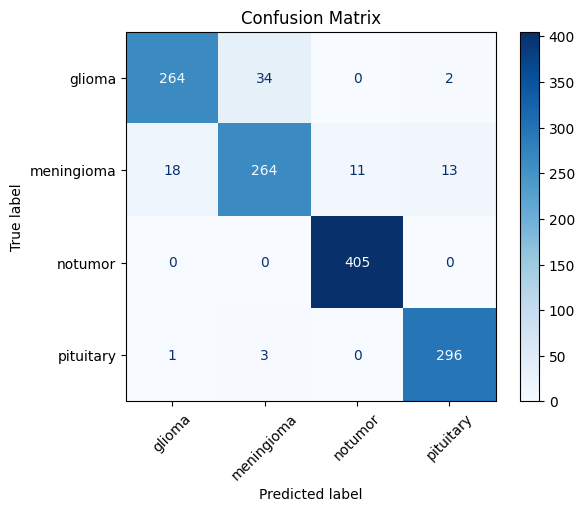


Classification Report:



              precision    recall  f1-score   support

      glioma       0.93      0.88      0.91       300
  meningioma       0.88      0.86      0.87       306
     notumor       0.97      1.00      0.99       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.94      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311



In [ ]:
# === STEP 1: Install & Import ===
#Brain Tumor
!pip install tensorflow scikit-learn --quiet

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === STEP 2: Define Paths and Parameters ===
IMG_SIZE = 128  # Smaller size = faster training
BATCH_SIZE = 32
EPOCHS = 5      # Reduce for speed
train_dir = "/content/drive/MyDrive/archive (10)/Training"
test_dir = "/content/drive/MyDrive/archive (10)/Testing"

# === STEP 3: Image Generators ===
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# === STEP 4: CNN Model ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 tumor types
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === STEP 5: Train Model ===
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data,
    verbose=1
)

# === STEP 6: Predictions ===
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# === STEP 7: Evaluation Metrics ===
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mse = mean_squared_error(y_true, y_pred)

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ MSE: {mse:.4f}")

# === STEP 8: Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# === STEP 9: Classification Report ===
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))
model.save("brain_tumor_classifier.h5")

✅ Accuracy:  0.9474
✅ Precision: 0.9583
✅ Recall:    0.9583
✅ F1 Score:  0.9583
✅ MSE:       0.0526
✅ AUC:       0.9931


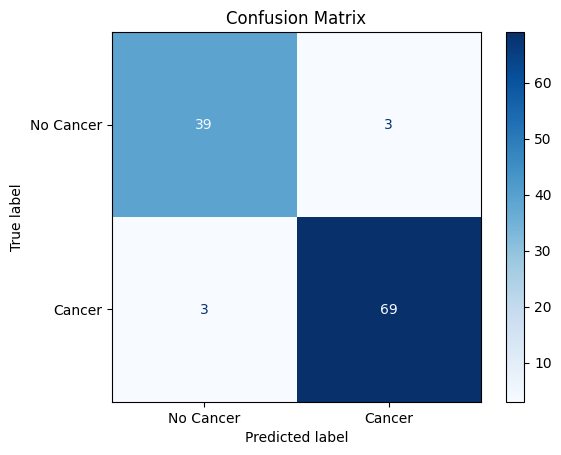

In [ ]:
# === Step 1: Import Libraries ===
#Breast Cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)

# === Step 2: Load Dataset ===
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# === Step 3: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 4: Normalize features ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Step 5: Hyperparameter tuning ===
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)
grid.fit(X_train, y_train)
model = grid.best_estimator_

# === Step 6: Evaluate model ===
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# === Step 7: Metrics ===
print(f"✅ Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred):.4f}")
print(f"✅ Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"✅ MSE:       {mean_squared_error(y_test, y_pred):.4f}")
print(f"✅ AUC:       {roc_auc_score(y_test, y_prob):.4f}")

# === Step 8: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


📊 MultinomialNB
Accuracy:  0.9343
Precision: 0.9294
Recall:    0.9320
F1 Score:  0.9307
AUC:       0.9826

📊 LogisticRegression
Accuracy:  0.9276
Precision: 0.9259
Recall:    0.9207
F1 Score:  0.9233
AUC:       0.9786

✅ Best Model: MultinomialNB


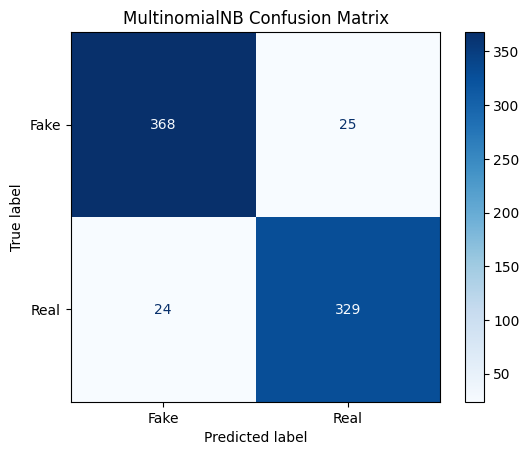

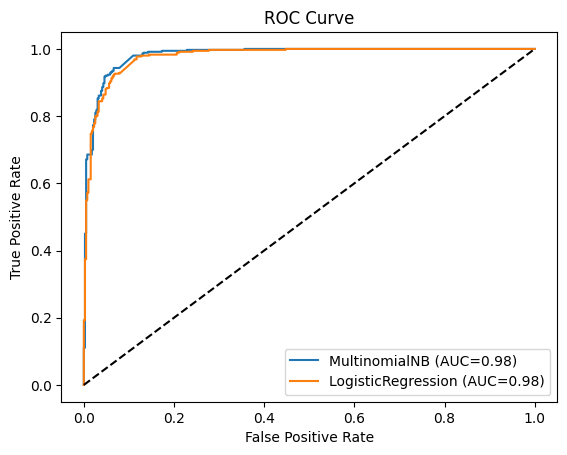

In [ ]:
# === Step 1: Install & Import ===
#Fake news Classifier
!pip install scikit-learn matplotlib seaborn --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

# === Step 2: Load Dataset ===
real_cats = ['sci.space', 'talk.politics.misc']
fake_cats = ['rec.autos', 'misc.forsale']

real = fetch_20newsgroups(subset='all', categories=real_cats, remove=('headers', 'footers', 'quotes'))
fake = fetch_20newsgroups(subset='all', categories=fake_cats, remove=('headers', 'footers', 'quotes'))

X = np.concatenate([real.data, fake.data])
y = np.concatenate([np.ones(len(real.data)), np.zeros(len(fake.data))])

# === Step 3: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Step 4: Text Vectorization ===
vect = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)

# === Step 5: Model Training + Tuning ===
models = {
    "MultinomialNB": (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0]}),
    "LogisticRegression": (LogisticRegression(max_iter=1000), {'C': [0.1, 1.0, 10.0]})
}
best_models = {}

for name, (model, params) in models.items():
    gs = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    gs.fit(X_train_tfidf, y_train)
    best_models[name] = gs.best_estimator_

# === Step 6: Evaluation ===
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_tfidf)
    y_prob = model.predict_proba(X_test_tfidf)[:, 1]
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Model": model
    }

# === Step 7: Show Results ===
for name, res in results.items():
    print(f"\n📊 {name}")
    print(f"Accuracy:  {res['Accuracy']:.4f}")
    print(f"Precision: {res['Precision']:.4f}")
    print(f"Recall:    {res['Recall']:.4f}")
    print(f"F1 Score:  {res['F1']:.4f}")
    print(f"AUC:       {res['AUC']:.4f}")

best = max(results, key=lambda x: results[x]['AUC'])
print(f"\n✅ Best Model: {best}")
y_pred_best = results[best]['Model'].predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','Real'])
disp.plot(cmap='Blues')
plt.title(f"{best} Confusion Matrix")
plt.show()

# === Step 8: ROC Curve ===
plt.figure()
for name, res in results.items():
    y_prob = res["Model"].predict_proba(X_test_tfidf)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={res['AUC']:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Model: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', LinearSVC(C=10))])

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4951
           1       0.90      0.93      0.91      5049

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



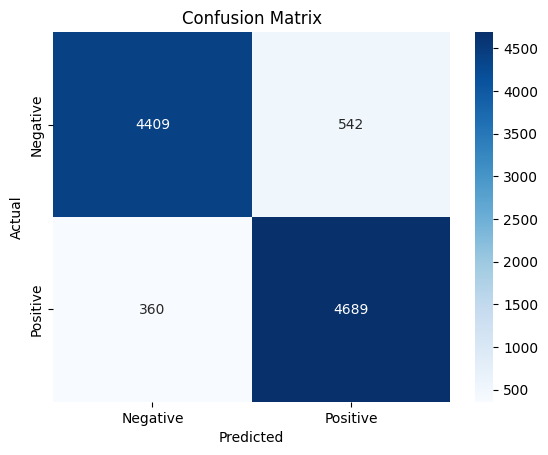

In [ ]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# === 2. Load Dataset ===
df = pd.read_csv("/content/drive/MyDrive/archive (11)/IMDB Dataset.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# === 3. Preprocessing ===
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    return text

df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# === 4. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42)

# === 5. Build Pipeline with Grid Search ===
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.9)),
    ('clf', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'clf': [LogisticRegression(solver='liblinear'), LinearSVC()],
    'clf__C': [0.1, 1, 10]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# === 6. Evaluation ===
y_pred = grid.predict(X_test)

print("Best Model:", grid.best_estimator_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 7. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Emotion dataset for NLP
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import joblib

# === 2. Load Dataset ===
def load_dataset(file_path):
    return pd.read_csv(file_path, sep=';', header=None, names=['text', 'label'])

train_df = load_dataset("/content/drive/MyDrive/archive (12)/train.txt")
val_df = load_dataset("/content/drive/MyDrive/archive (12)/val.txt")
test_df = load_dataset("/content/drive/MyDrive/archive (12)/test.txt")

# Combine train + val
df = pd.concat([train_df, val_df], ignore_index=True)

# === 3. Encode Labels ===
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
test_df['label_enc'] = le.transform(test_df['label'])

# === 4. TF-IDF Vectorization ===
tfidf = TfidfVectorizer(max_features=5000)
X_train_raw = tfidf.fit_transform(df['text'])
X_test_raw = tfidf.transform(test_df['text'])
y_train = df['label_enc']
y_test = test_df['label_enc']

# === 5. Normalization ===
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# === 6. Hyperparameter Tuning: Logistic Regression ===
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# === 7. Evaluation ===
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mse = mean_squared_error(y_test, y_pred)

print("\n✅ Best Parameters:", grid.best_params_)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === 8. Print Metrics ===
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ MSE: {mse:.4f}")

# === 9. Predict Function ===
def predict_emotion(text):
    vec = tfidf.transform([text])
    vec_scaled = scaler.transform(vec)
    pred = best_model.predict(vec_scaled)
    return le.inverse_transform(pred)[0]

# === 10. Try Examples ===
sample_texts = [
    "I am feeling so happy and joyful!",
    "This is frustrating and annoying.",
    "I'm scared of what might happen tomorrow.",
    "Thank you so much for your help!",
]
for text in sample_texts:
    print(f"'{text}' => {predict_emotion(text)}")

# === 11. Save Models ===
joblib.dump(best_model, "best_emotion_model.pkl")
joblib.dump(tfidf, "best_tfidf_vectorizer.pkl")
joblib.dump(le, "best_label_encoder.pkl")
joblib.dump(scaler, "best_scaler.pkl")


✅ Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

📊 Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.90      0.90       275
        fear       0.89      0.88      0.88       224
         joy       0.91      0.93      0.92       695
        love       0.79      0.77      0.78       159
     sadness       0.94      0.94      0.94       581
    surprise       0.75      0.65      0.70        66

    accuracy                           0.90      2000
   macro avg       0.87      0.85      0.85      2000
weighted avg       0.90      0.90      0.90      2000

🔍 Confusion Matrix:
 [[247   6   8   0  13   1]
 [  6 196   3   0  14   5]
 [  4   3 647  31   4   6]
 [  2   0  32 123   1   1]
 [ 14   3  14   1 548   1]
 [  1  11  10   0   1  43]]

✅ Accuracy: 0.9020
✅ Precision: 0.9011
✅ Recall: 0.9020
✅ F1 Score: 0.9013
✅ MSE: 0.6310
'I am feeling so happy and joyful!' => joy
'This is frustrating and annoying.' => joy
'

['best_scaler.pkl']

🔷 Confusion Matrix:
 [[11513  4866]
 [ 2093 86691]]

✅ Accuracy: 0.9338
✅ Precision: 0.9469
✅ Recall: 0.9764
✅ F1 Score: 0.9614
✅ MSE: 0.0662


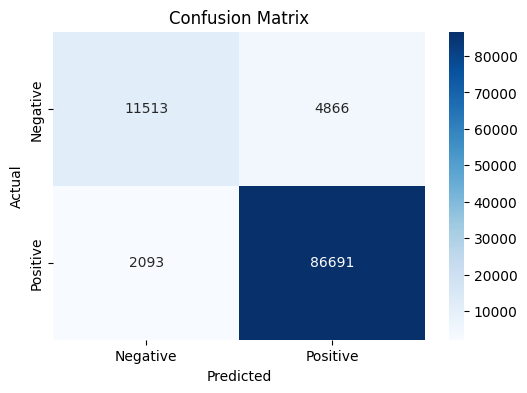


📊 Sample Predictions:
'This product is amazing!' => Positive
'Terrible experience and waste of money.' => Negative


In [ ]:
#Amazon fine food review/Product review
# === 1. Import Required Libraries ===
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# === 2. Load Dataset ===
df = pd.read_csv('/content/drive/MyDrive/archive (13)/Reviews.csv')
df = df[['Text', 'Score']].dropna()

# === 3. Label Encoding: 1 (Positive), 0 (Negative) ===
df = df[df['Score'] != 3]  # Remove neutral
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# === 4. Text Cleaning Function ===
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

# === 5. Train-Test Split ===
X = df['Cleaned_Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 6. TF-IDF Vectorization ===
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# === 7. Train Logistic Regression ===
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# === 8. Prediction & Evaluation ===
y_pred = model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("🔷 Confusion Matrix:\n", cm)
print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ MSE: {mse:.4f}")

# === 9. Heatmap of Confusion Matrix ===
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === 10. Save Model & Vectorizer ===
joblib.dump(model, "product_review_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# === 11. Test on Custom Input ===
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

print("\n📊 Sample Predictions:")
print("'This product is amazing!' =>", predict_sentiment("This product is amazing!"))
print("'Terrible experience and waste of money.' =>", predict_sentiment("Terrible experience and waste of money."))

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, mean_squared_error)
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K

# === Reproducibility ===
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# === Load Dataset ===
data_frame = pd.read_csv("/content/drive/MyDrive/smmh.csv")
target_column = '18. How often do you feel depressed or down?'
data_frame[target_column] = data_frame[target_column].apply(lambda x: 1 if 2 < x <= 5 else 0)

# === Dataset Overview ===
print("\n=== Dataset Summary ===")
print(f"Total samples: {data_frame.shape[0]}")
print(f"Total features (before dummies): {data_frame.shape[1] - 1}")
print(f"Target value counts:\n{data_frame[target_column].value_counts()}")
sns.countplot(data=data_frame, x=target_column)
plt.title("Target Class Distribution")
plt.show()

# === Correlation Matrix ===
plt.figure(figsize=(12, 8))
sns.heatmap(data_frame.select_dtypes(include=[np.number]).corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# === Covariance Matrix ===
plt.figure(figsize=(12, 8))
sns.heatmap(data_frame.select_dtypes(include=[np.number]).cov(), cmap="YlGnBu")
plt.title("Covariance Matrix")
plt.tight_layout()
plt.show()

# === Feature Distribution (Top 15 by Mean) ===
X_temp = pd.get_dummies(data_frame.drop(columns=[target_column]), drop_first=True)
feature_means = X_temp.mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_means.values, y=feature_means.index)
plt.title("Top 15 Features by Mean Value")
plt.xlabel("Mean Value")
plt.tight_layout()
plt.show()

# === Preprocessing ===
X = pd.get_dummies(data_frame.drop(columns=[target_column]), drop_first=True)
y = data_frame[target_column]
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

scaler = RobustScaler()
qt = QuantileTransformer(output_distribution='normal', random_state=42)
pt = PowerTransformer(method='yeo-johnson', standardize=True)

X_scaled = scaler.fit_transform(X_resampled)
X_qt = qt.fit_transform(X_scaled)
X_pt = pt.fit_transform(X_qt)

pca = PCA(whiten=True, n_components=0.98)
X_final = pca.fit_transform(X_pt)

# === K-Fold CV ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mse': [], 'confusion_matrices': []}

# === Focal Loss ===
def focal_loss(gamma=2.0, alpha=0.42):
    def loss_fn(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(K.equal(y_true, 1), y_pred, K.ones_like(y_pred))
        pt_0 = tf.where(K.equal(y_true, 0), y_pred, K.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1 + epsilon)) - \
               K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + epsilon))
    return loss_fn

# === Model Definition ===
def create_model():
    model = Sequential([
        Dense(512, activation='swish', kernel_regularizer=l2(0.00002), input_shape=(X_final.shape[1],)),
        BatchNormalization(), Dropout(0.30),
        Dense(256, activation='swish', kernel_regularizer=l2(0.00002)),
        BatchNormalization(), Dropout(0.25),
        Dense(128, activation='relu', kernel_regularizer=l2(0.00002)),
        Dropout(0.20),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.00012), loss=focal_loss(), metrics=['accuracy'])
    return model

# === Training & Evaluation ===
for fold, (train_idx, test_idx) in enumerate(kf.split(X_final)):
    print(f"\n=== Fold {fold + 1} ===")
    X_train, X_test = X_final[train_idx], X_final[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: w for i, w in enumerate(class_weights)}

    model = create_model()
    history = model.fit(
        X_train, y_train,
        epochs=300, batch_size=32,
        validation_split=0.2,
        callbacks=[EarlyStopping(patience=30, restore_best_weights=True)],
        class_weight=class_weight_dict,
        verbose=1
    )

    probs = model.predict(X_test).flatten()
    preds = (probs >= 0.5).astype(int)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    fold_metrics['accuracy'].append(acc)
    fold_metrics['precision'].append(prec)
    fold_metrics['recall'].append(rec)
    fold_metrics['f1'].append(f1)
    fold_metrics['mse'].append(mse)
    fold_metrics['confusion_matrices'].append(cm)

    print(f"Accuracy: {acc * 100:.2f}%\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1: {f1:.2f}\nMSE: {mse:.4f}")
    print("Confusion Matrix:\n", cm)

    # Plot accuracy/loss for each fold
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Accuracy per Epoch")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss per Epoch")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Average Metrics ===
print("\n=== Average Metrics Across Folds ===")
print(f"Accuracy: {np.mean(fold_metrics['accuracy']) * 100:.2f}%")
print(f"Precision: {np.mean(fold_metrics['precision']):.2f}")
print(f"Recall: {np.mean(fold_metrics['recall']):.2f}")
print(f"F1 Score: {np.mean(fold_metrics['f1']):.2f}")
print(f"MSE: {np.mean(fold_metrics['mse']):.4f}")